# Library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# WLH_prediction

climate_test shape: (111200, 4), range: -9999.0 ~ 40.96918487548828
Height_test shape: (111200, 24, 24, 3), range: 0.0 ~ 0.9960784316062927
NDVI_test shape: (111200, 24, 24, 3), range: 0.0 ~ 0.9764705896377563
Slope_test shape: (111200, 24, 24, 3), range: 0.0 ~ 1.0
landuse_test shape: (111200, 24, 24, 3), range: 0.0 ~ 0.9686274528503418
popden_test shape: (111200, 24, 24, 3), range: 0.0 ~ 1.0
Updated climate_test shape: (111200, 4, 1)
1/1 [==============================] - 0s 221ms/step


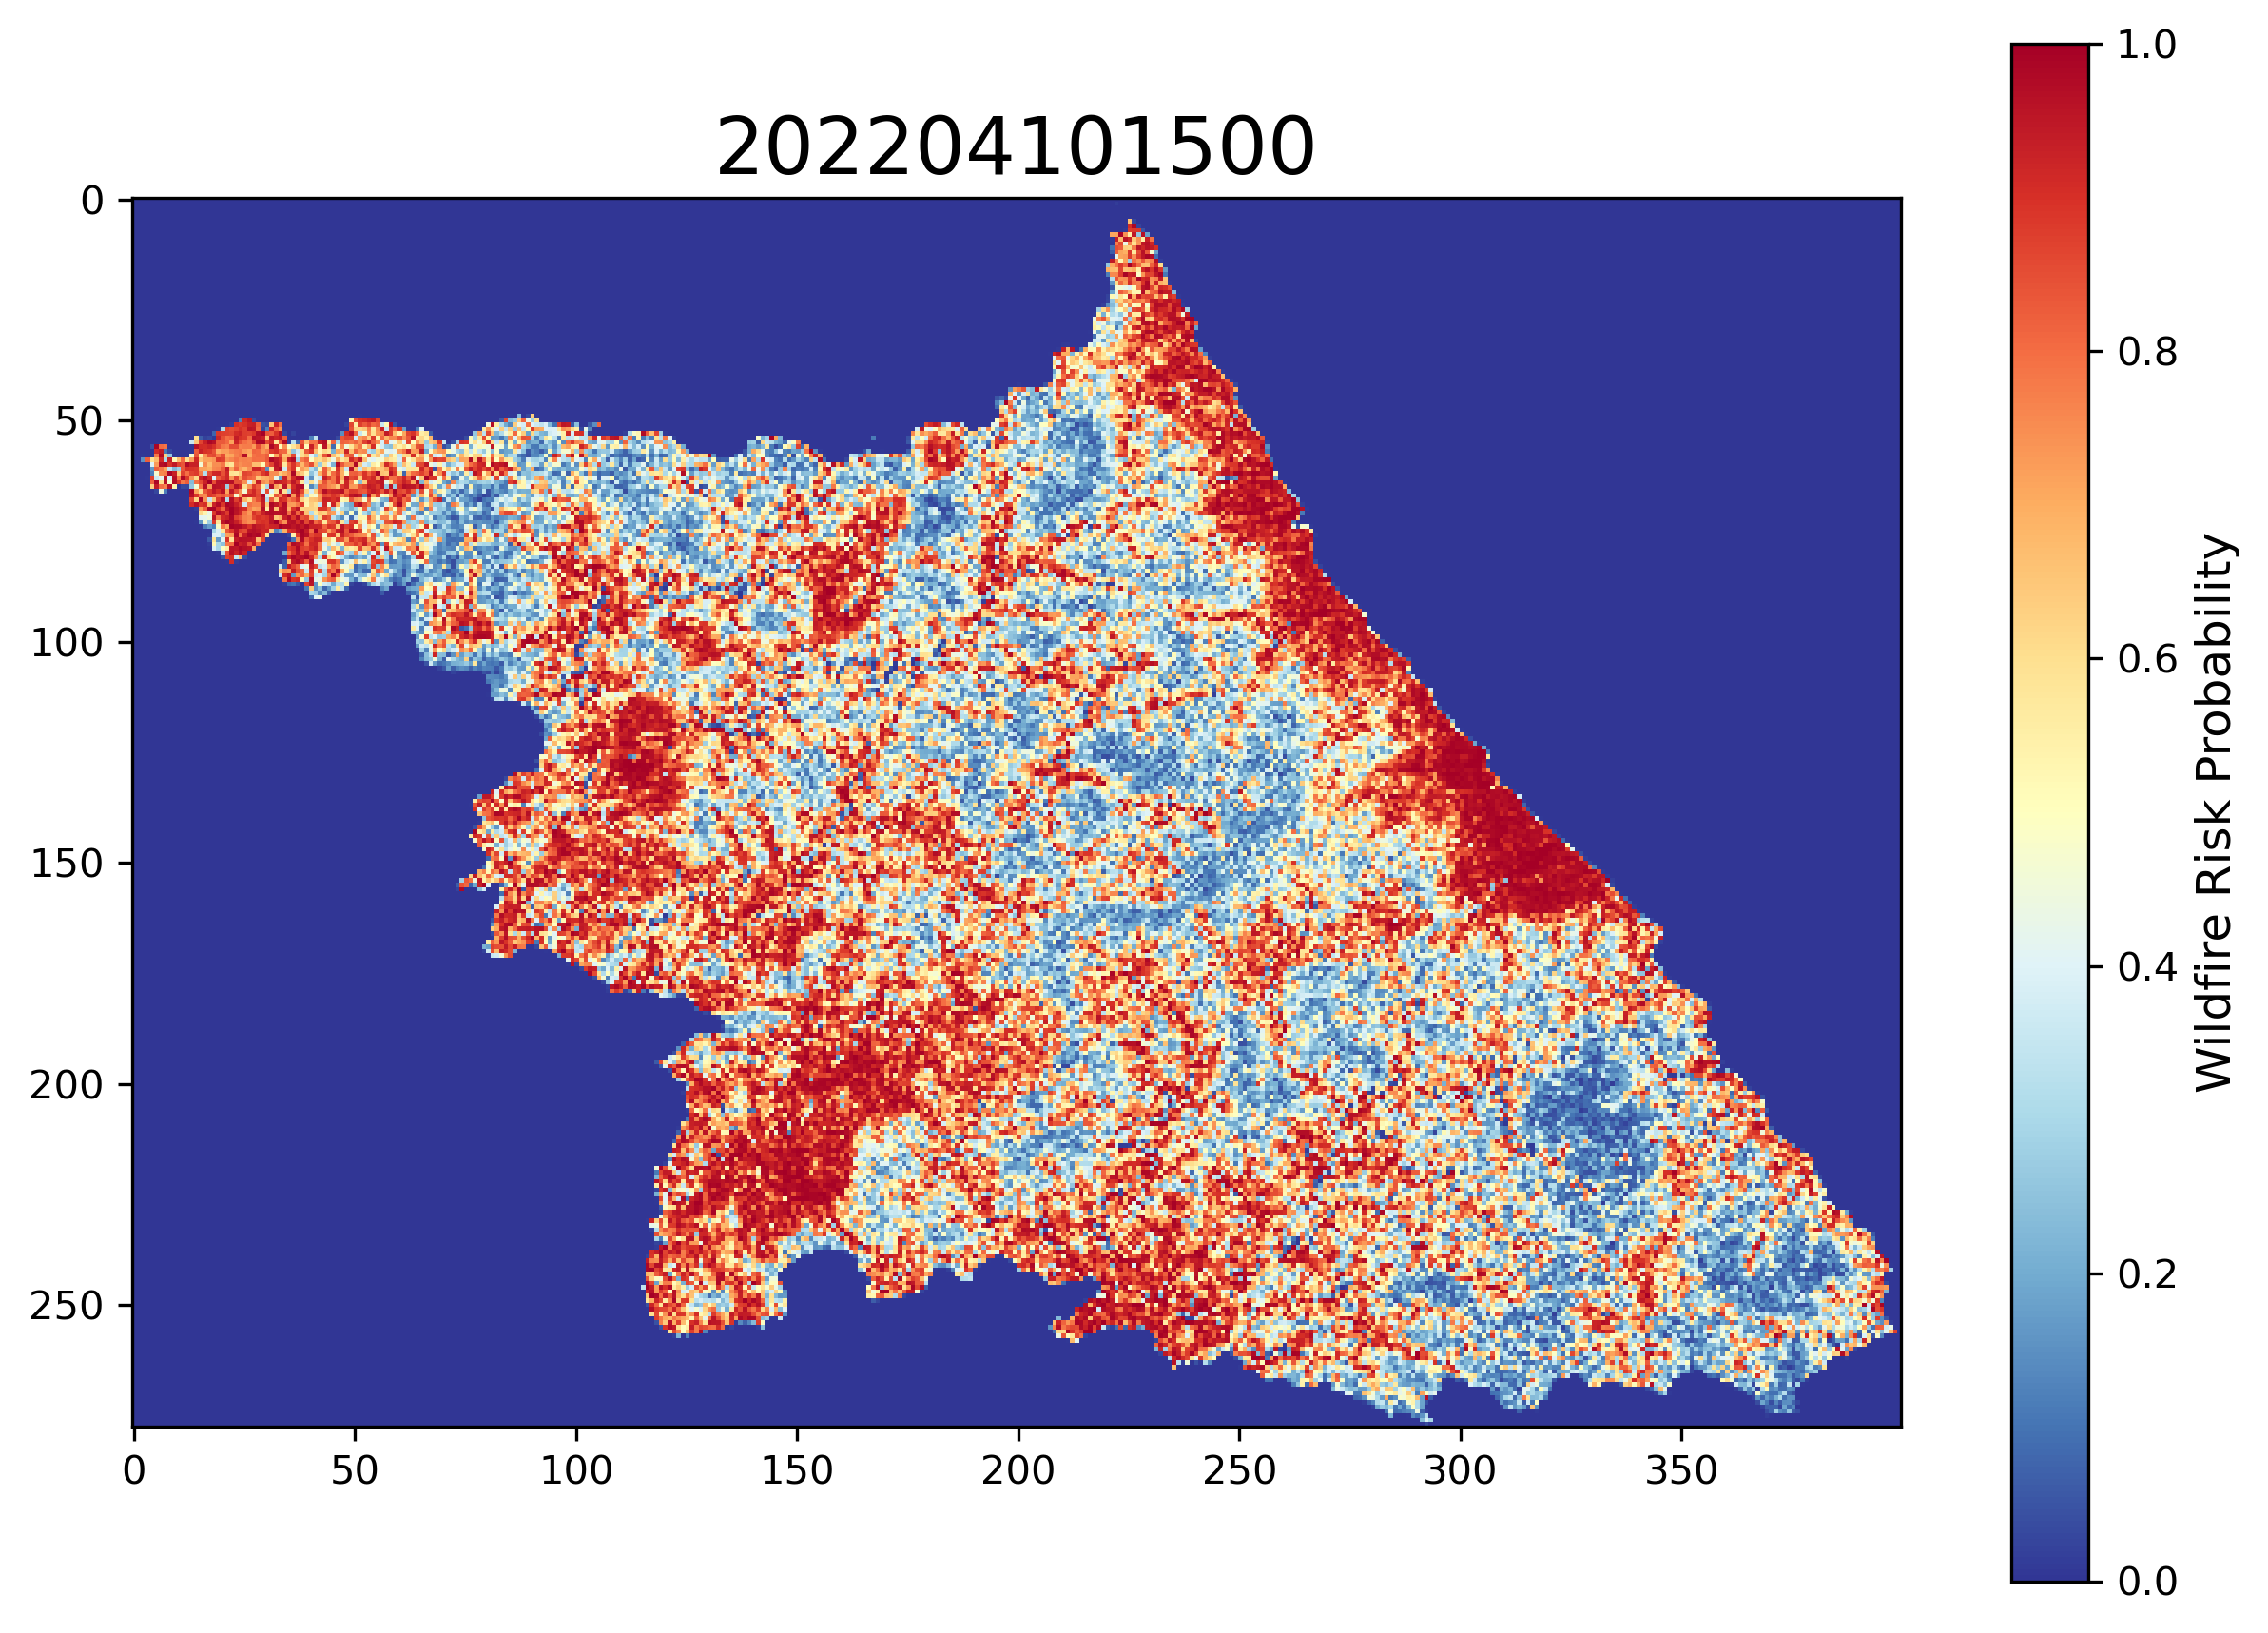

In [5]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. Load model
model_path = "Model_save/WLH_Model.h5"  # Path to the saved .h5 model
model = tf.keras.models.load_model(model_path)  # Load the h5 model

# 2. Load input data
inputdate = '202204101500'  # Target date and time to analyze
climate_test = np.load(f'Data/Test_data/{inputdate}/{inputdate}.npy')
Height_test = np.load('Data/Test_data/Height_test.npy')
NDVI_test = np.load('Data/Test_data/NDVI_test.npy')
Slope_test = np.load('Data/Test_data/Slope_test.npy')
landuse_test = np.load('Data/Test_data/Landuse_test.npy')
popden_test = np.load('Data/Test_data/population_density_test.npy')

# Convert data types
Height_test = Height_test.astype(np.float32)
NDVI_test = NDVI_test.astype(np.float32)
Slope_test = Slope_test.astype(np.float32)
landuse_test = landuse_test.astype(np.float32)
popden_test = popden_test.astype(np.float32)
climate_test = climate_test.astype(np.float32)

# Check shape and value range of each input
print(f"climate_test shape: {climate_test.shape}, range: {climate_test.min()} ~ {climate_test.max()}")
print(f"Height_test shape: {Height_test.shape}, range: {Height_test.min()} ~ {Height_test.max()}")
print(f"NDVI_test shape: {NDVI_test.shape}, range: {NDVI_test.min()} ~ {NDVI_test.max()}")
print(f"Slope_test shape: {Slope_test.shape}, range: {Slope_test.min()} ~ {Slope_test.max()}")
print(f"landuse_test shape: {landuse_test.shape}, range: {landuse_test.min()} ~ {landuse_test.max()}")
print(f"popden_test shape: {popden_test.shape}, range: {popden_test.min()} ~ {popden_test.max()}")

# Expand dimension for climate input
climate_test = climate_test[:, :, np.newaxis]
print(f"Updated climate_test shape: {climate_test.shape}")

# Set batch size
batch_size = 1000  # Adjust based on memory availability
num_samples = climate_test.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))

# Initialize prediction result array
y_pred_full = np.zeros(num_samples)

# Run inference in batches
for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, num_samples)

    # Extract batch input
    batch_height = Height_test[start_idx:end_idx]
    batch_ndvi = NDVI_test[start_idx:end_idx]
    batch_slope = Slope_test[start_idx:end_idx]
    batch_landuse = landuse_test[start_idx:end_idx]
    batch_popden = popden_test[start_idx:end_idx]
    batch_climate = climate_test[start_idx:end_idx]

    # Prepare model input dictionary
    x_test = {
        'height_input': batch_height,
        'ndvi_input': batch_ndvi,
        'slope_input': batch_slope,
        'landuse_input': batch_landuse,
        'popden_input': batch_popden,
        'climate_input': batch_climate,
    }

    # Run prediction
    try:
        y_pred_batch = model.predict(x_test, batch_size=batch_size)
        y_pred_full[start_idx:end_idx] = y_pred_batch.ravel()
    except Exception as e:
        print(f"Error during inference in batch {batch_idx}: {e}")
        break

# Reshape flat prediction array to 2D grid (for visualization)
result_arr = np.zeros((278, 400))  # Initialize 2D result array
x = 0
for i in range(278):
    for j in range(400):
        result_arr[i, j] = y_pred_full[x]
        x += 1

# Visualization (with continuous colormap)
fig = plt.figure(figsize=(10, 7), dpi=300)
plt.title(f"{inputdate}", fontsize=20)

cmap = plt.cm.RdYlBu_r
plt.imshow(result_arr, cmap=cmap, vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Wildfire Risk Probability', fontsize=12)

plt.show()


# WL_prediction

climate_test shape: (111200, 4), range: -9999.0 ~ 40.96918487548828
Height_test shape: (111200, 24, 24, 3), range: 0.0 ~ 0.9960784316062927
NDVI_test shape: (111200, 24, 24, 3), range: 0.0 ~ 0.9764705896377563
Slope_test shape: (111200, 24, 24, 3), range: 0.0 ~ 1.0
Updated climate_test shape: (111200, 4, 1)
1/1 [==============================] - 0s 164ms/step


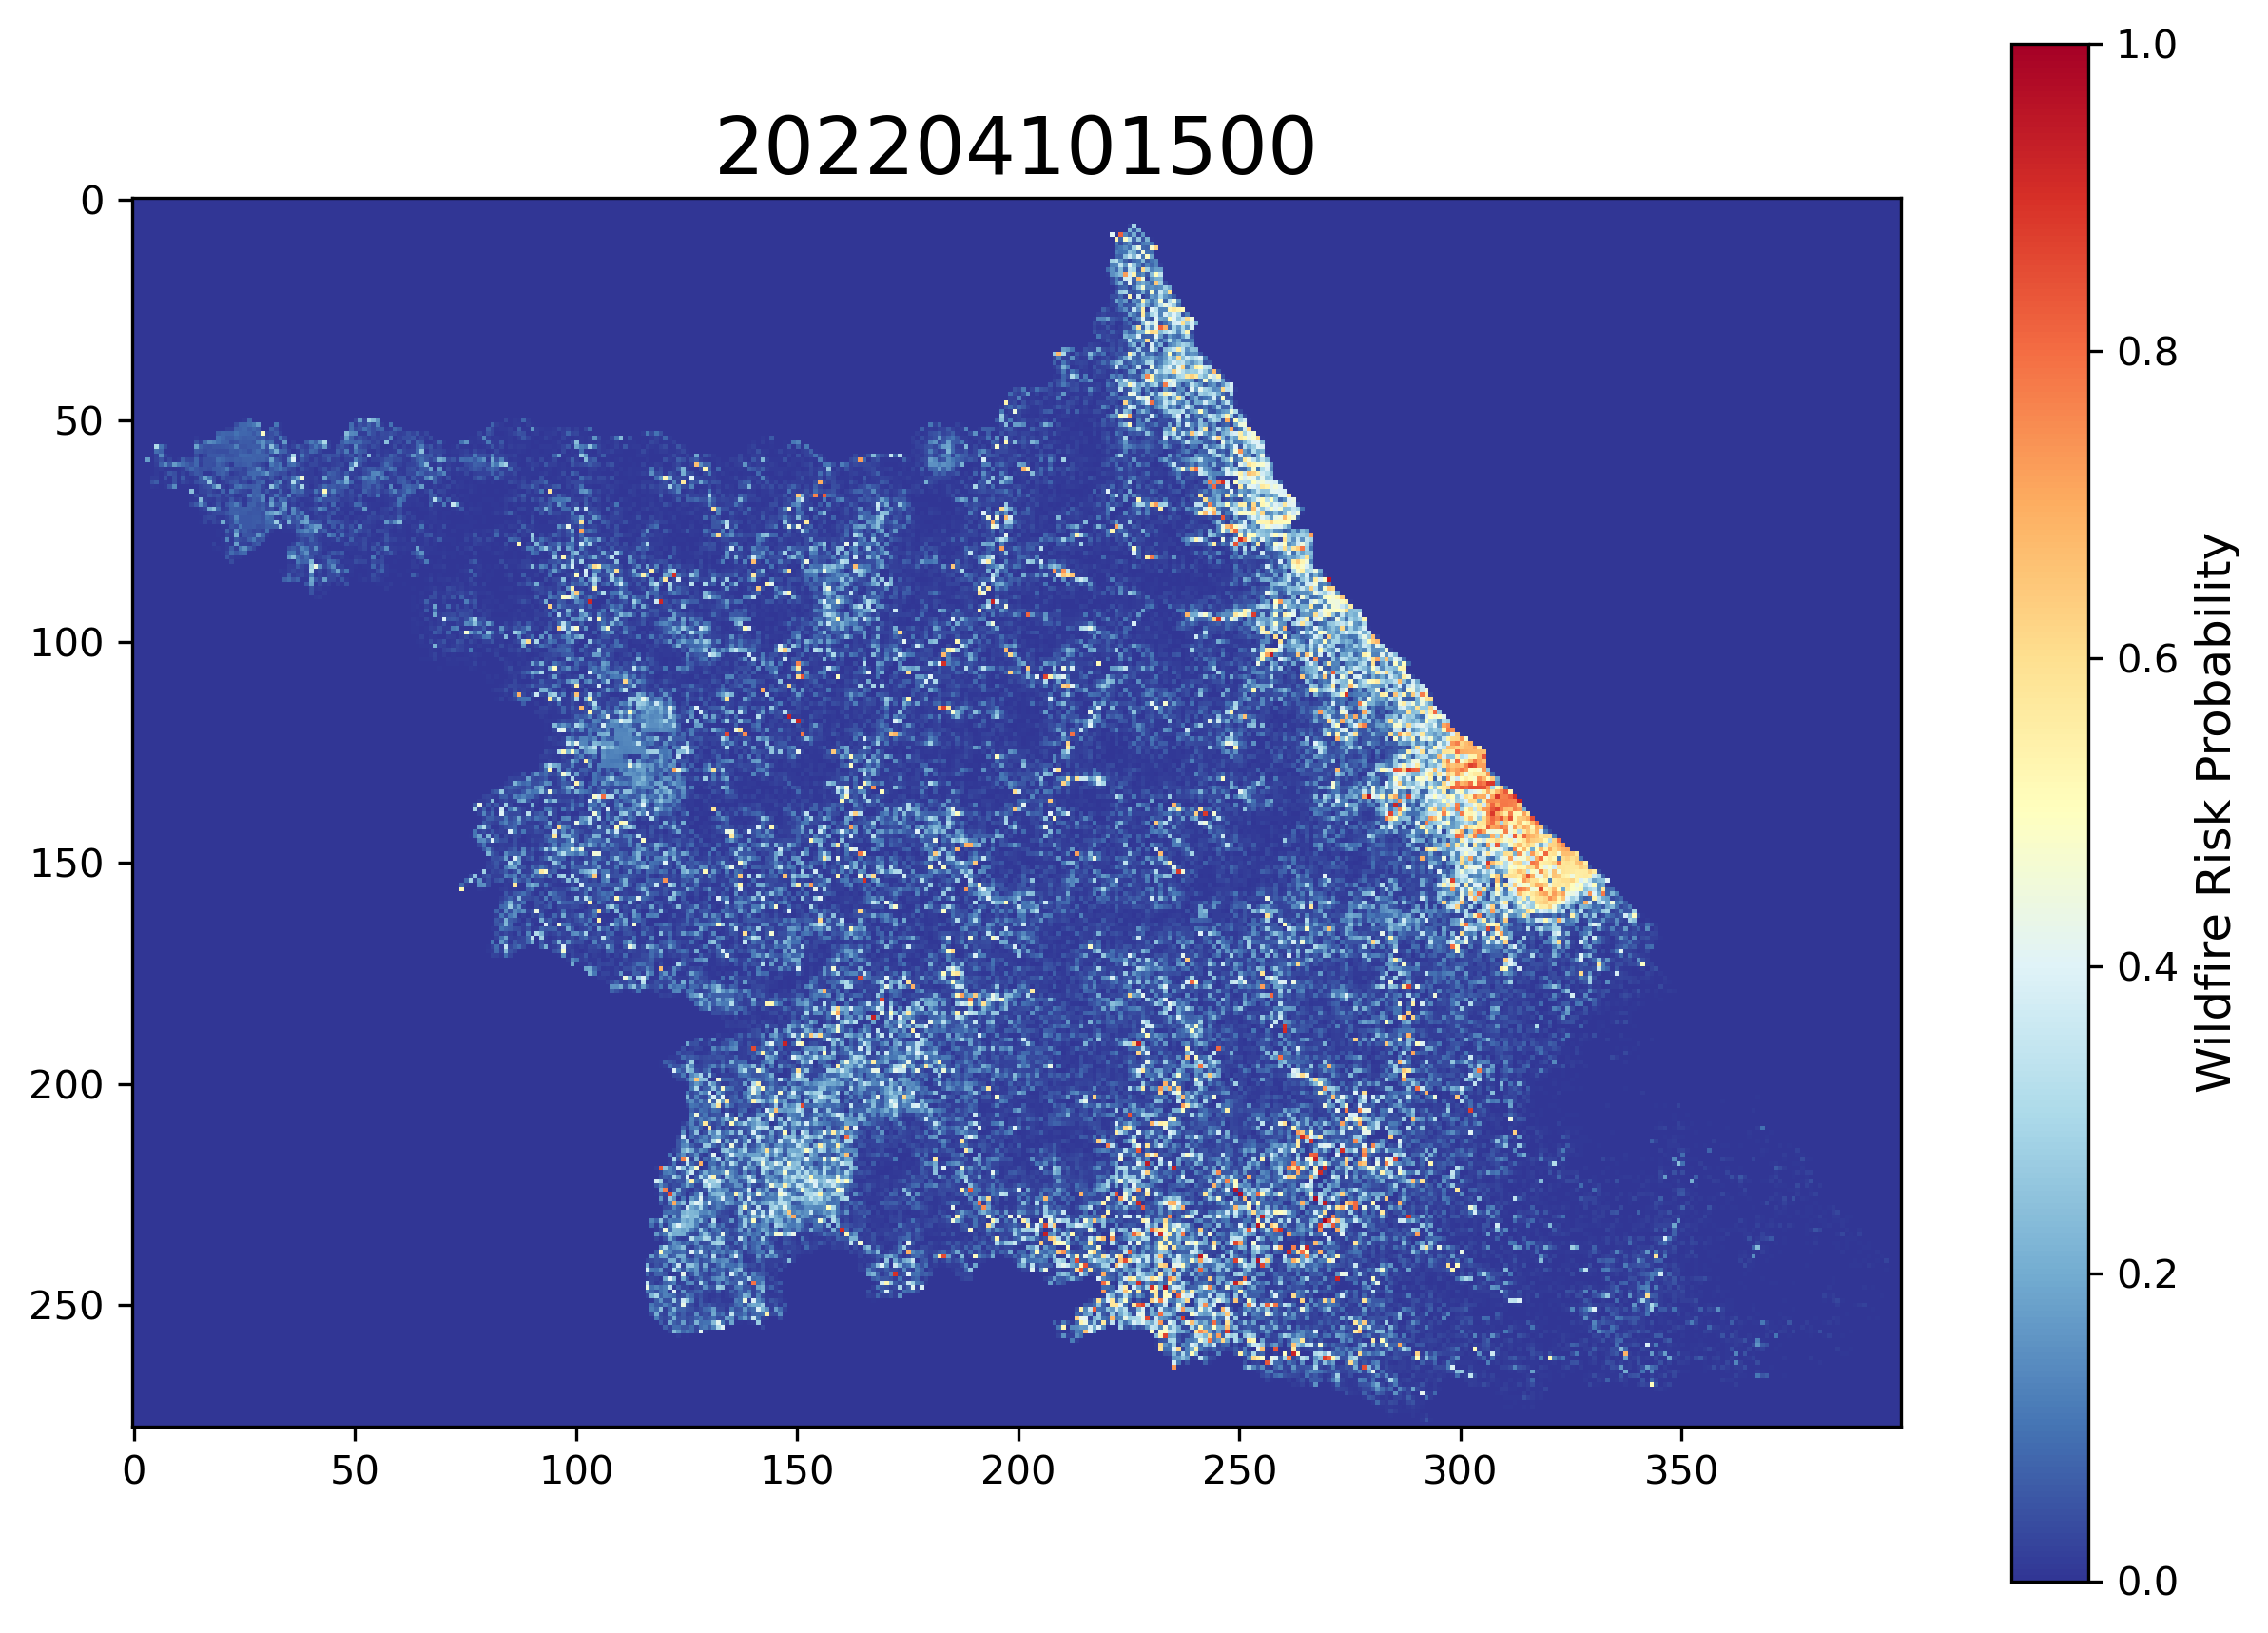

In [6]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. Load model
model_path = "Model_save/WL_Model.h5"  # Path to the saved .h5 model
model = tf.keras.models.load_model(model_path)  # Load the h5 model

# 2. Load input data
inputdate = '202204101500'  # Target date and time to analyze
climate_test = np.load(f'Data/Test_data/{inputdate}/{inputdate}.npy')
Height_test = np.load('Data/Test_data/Height_test.npy')
NDVI_test = np.load('Data/Test_data/NDVI_test.npy')
Slope_test = np.load('Data/Test_data/Slope_test.npy')

# Convert data types
Height_test = Height_test.astype(np.float32)
NDVI_test = NDVI_test.astype(np.float32)
Slope_test = Slope_test.astype(np.float32)
climate_test = climate_test.astype(np.float32)

# Check shape and value range of each input
print(f"climate_test shape: {climate_test.shape}, range: {climate_test.min()} ~ {climate_test.max()}")
print(f"Height_test shape: {Height_test.shape}, range: {Height_test.min()} ~ {Height_test.max()}")
print(f"NDVI_test shape: {NDVI_test.shape}, range: {NDVI_test.min()} ~ {NDVI_test.max()}")
print(f"Slope_test shape: {Slope_test.shape}, range: {Slope_test.min()} ~ {Slope_test.max()}")

# Expand dimension for climate input
climate_test = climate_test[:, :, np.newaxis]
print(f"Updated climate_test shape: {climate_test.shape}")

# Set batch size
batch_size = 1000  # Adjust based on memory availability
num_samples = climate_test.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))

# Initialize prediction result array
y_pred_full = np.zeros(num_samples)

# Run inference in batches
for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, num_samples)

    # Extract batch input
    batch_height = Height_test[start_idx:end_idx]
    batch_ndvi = NDVI_test[start_idx:end_idx]
    batch_slope = Slope_test[start_idx:end_idx]
    batch_climate = climate_test[start_idx:end_idx]

    # Prepare model input dictionary
    x_test = {
        'height_input': batch_height,
        'ndvi_input': batch_ndvi,
        'slope_input': batch_slope,
        'climate_input': batch_climate,
    }

    # Run prediction
    try:
        y_pred_batch = model.predict(x_test, batch_size=batch_size)
        y_pred_full[start_idx:end_idx] = y_pred_batch.ravel()
    except Exception as e:
        print(f"Error during inference in batch {batch_idx}: {e}")
        break

# Reshape flat prediction array to 2D grid (for visualization)
result_arr = np.zeros((278, 400))  # Initialize 2D result array
x = 0
for i in range(278):
    for j in range(400):
        result_arr[i, j] = y_pred_full[x]
        x += 1

# Visualization (with continuous colormap)
fig = plt.figure(figsize=(10, 7), dpi=300)
plt.title(f"{inputdate}", fontsize=20)

cmap = plt.cm.RdYlBu_r
plt.imshow(result_arr, cmap=cmap, vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Wildfire Risk Probability', fontsize=12)

plt.show()


# W_prediction

climate_test shape: (111200, 4), range: -9999.0 ~ 40.96918487548828
Updated climate_test shape: (111200, 4, 1)
1/1 [==============================] - 0s 63ms/step


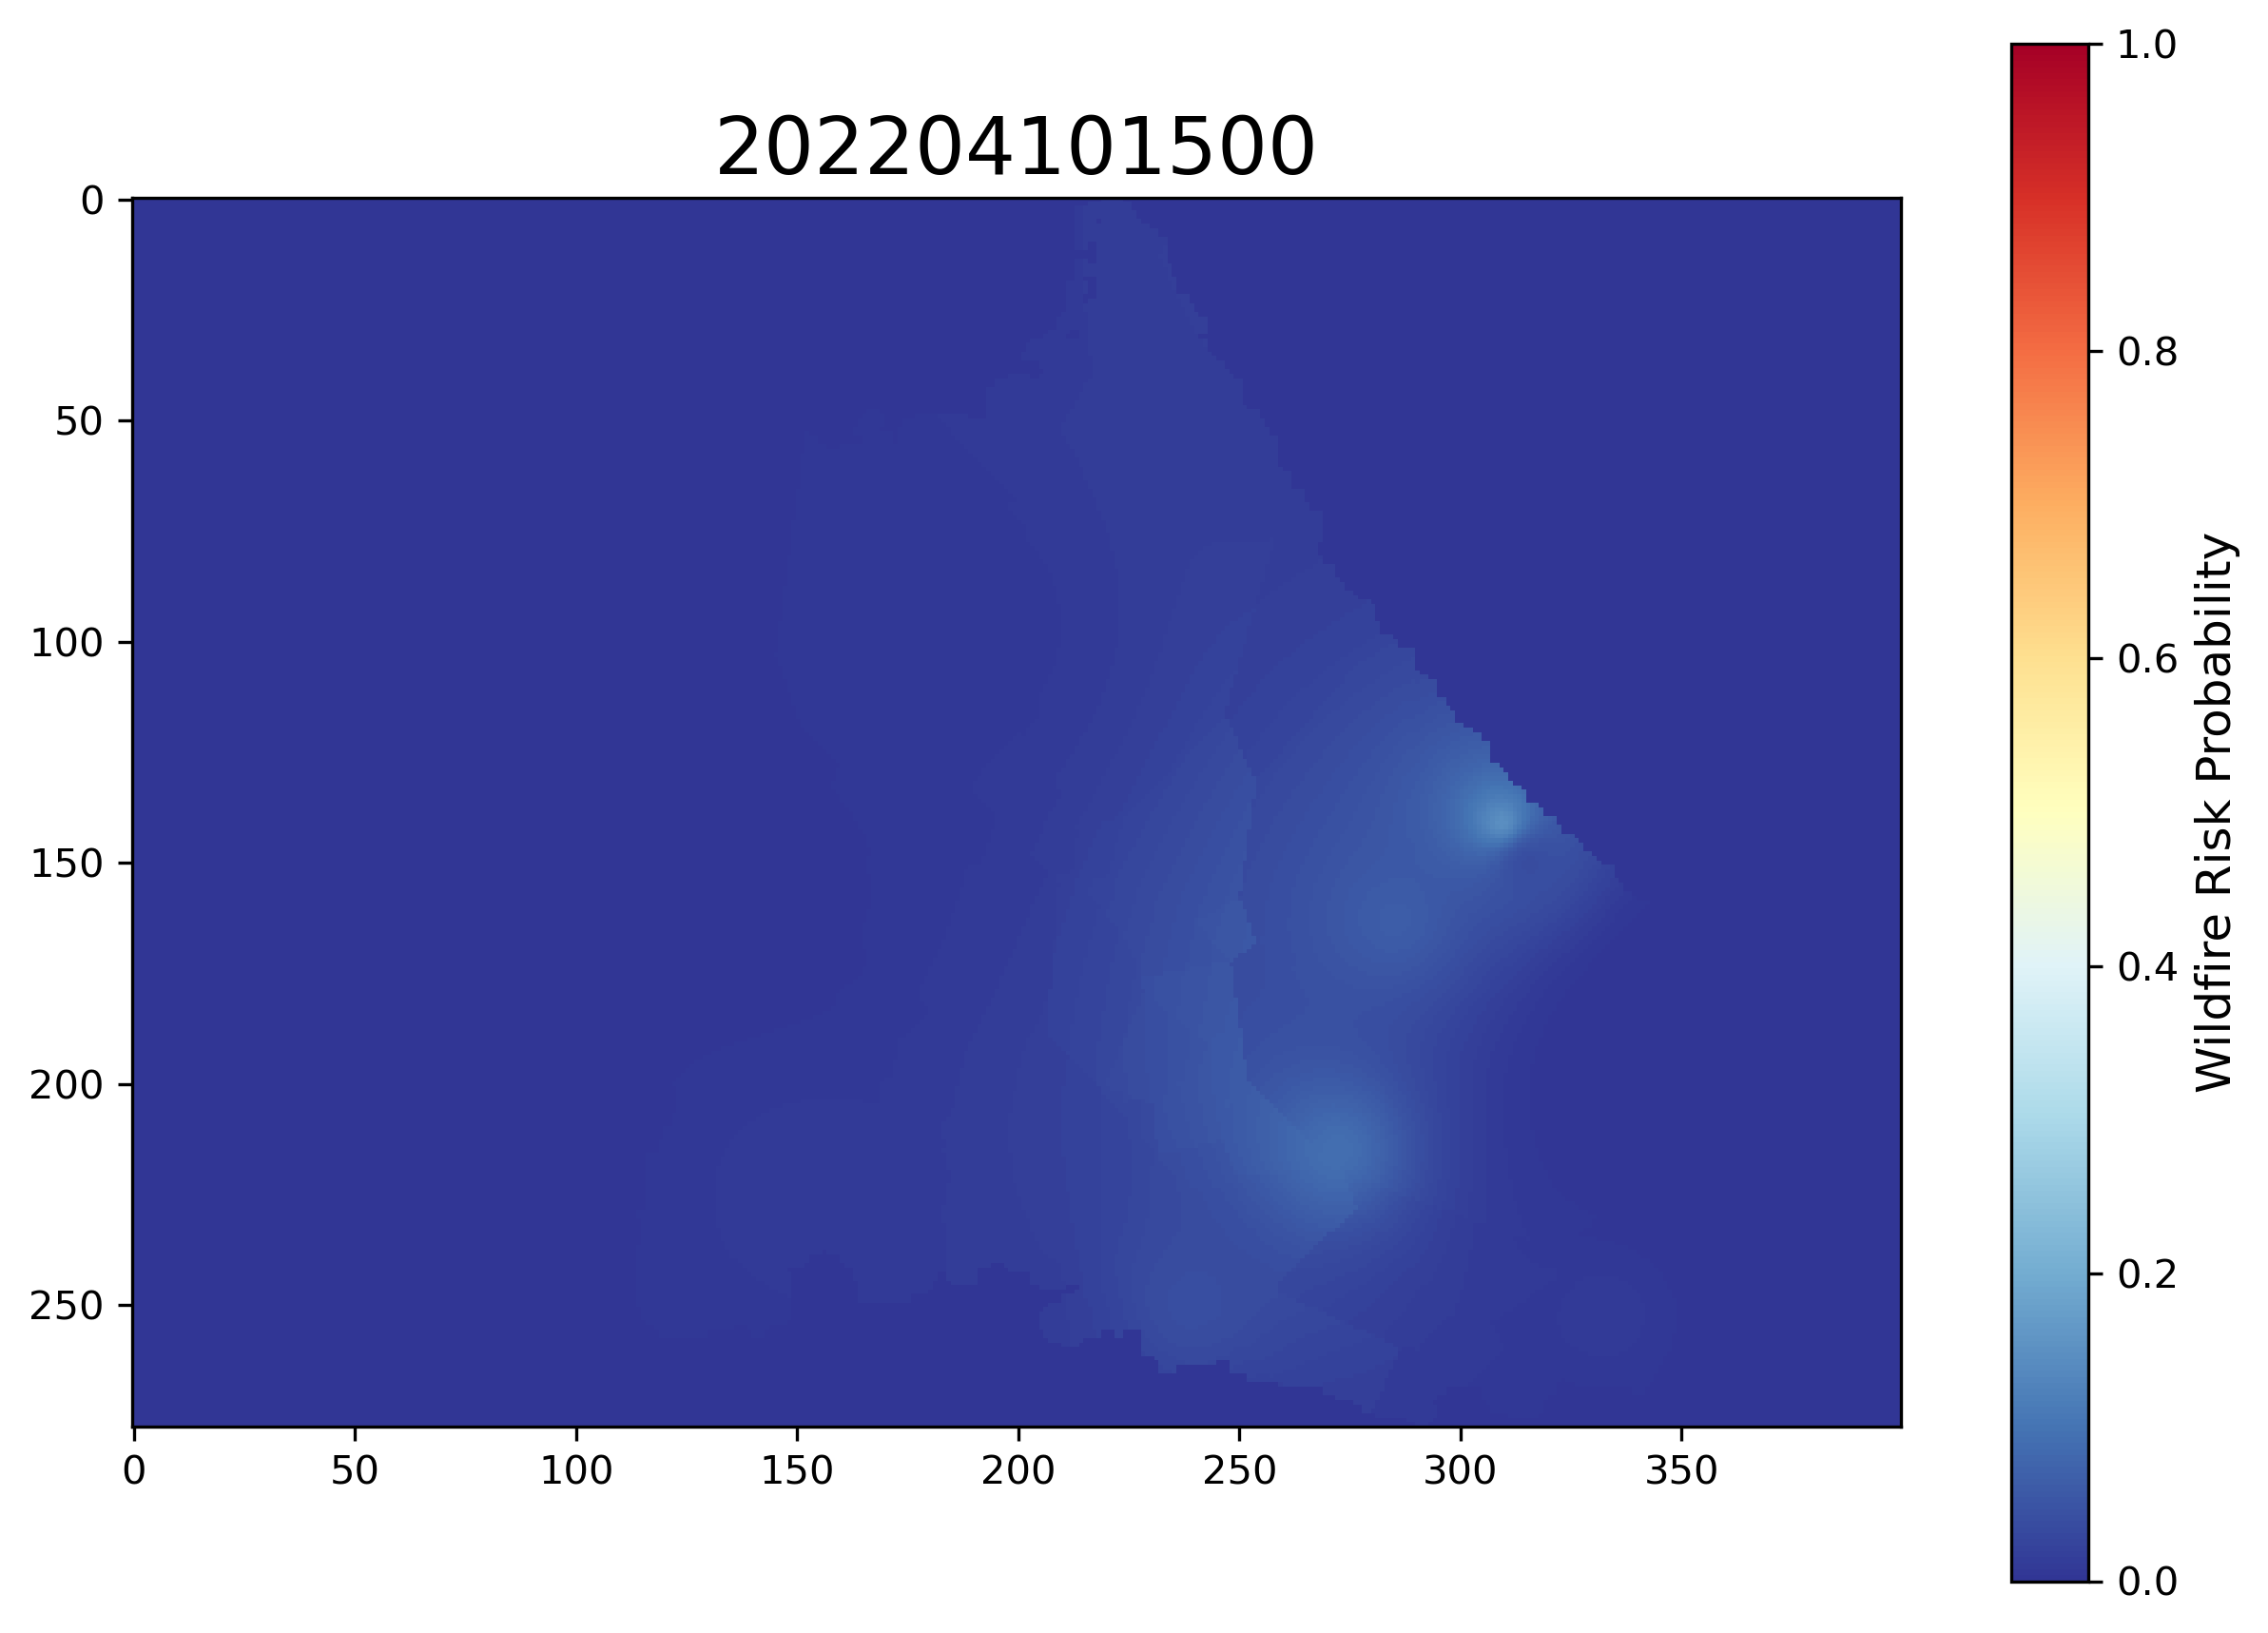

In [7]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. Load model
model_path = "Model_save/W_Model.h5"  # Path to the saved .h5 model
model = tf.keras.models.load_model(model_path)  # Load the h5 model

# 2. Load input data
inputdate = '202204101500'  # Target date and time to analyze
climate_test = np.load(f'Data/Test_data/{inputdate}/{inputdate}.npy')

# Convert data types
climate_test = climate_test.astype(np.float32)

# Check shape and value range of each input
print(f"climate_test shape: {climate_test.shape}, range: {climate_test.min()} ~ {climate_test.max()}")

# Expand dimension for climate input
climate_test = climate_test[:, :, np.newaxis]
print(f"Updated climate_test shape: {climate_test.shape}")

# Set batch size
batch_size = 1000  # Adjust based on memory availability
num_samples = climate_test.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))

# Initialize prediction result array
y_pred_full = np.zeros(num_samples)

# Run inference in batches
for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, num_samples)

    # Extract batch input
    batch_climate = climate_test[start_idx:end_idx]

    # Prepare model input dictionary
    x_test = {
        'climate_input': batch_climate,
    }

    # Run prediction
    try:
        y_pred_batch = model.predict(x_test, batch_size=batch_size)
        y_pred_full[start_idx:end_idx] = y_pred_batch.ravel()
    except Exception as e:
        print(f"Error during inference in batch {batch_idx}: {e}")
        break

# Reshape flat prediction array to 2D grid (for visualization)
result_arr = np.zeros((278, 400))  # Initialize 2D result array
x = 0
for i in range(278):
    for j in range(400):
        result_arr[i, j] = y_pred_full[x]
        x += 1

# Visualization (with continuous colormap)
fig = plt.figure(figsize=(10, 7), dpi=300)
plt.title(f"{inputdate}", fontsize=20)

cmap = plt.cm.RdYlBu_r
plt.imshow(result_arr, cmap=cmap, vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Wildfire Risk Probability', fontsize=12)

plt.show()
